In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [56]:
n_trials = 100000
np.random.seed(99)  # 再現性のため


def nao_mode1(n_trials=n_trials):
    """
    なおver 選択肢1のシミュレーション
    6面ダイス10個の合計 × 100
    """
    results = []
    for _ in range(n_trials):
        dice_sum = np.random.randint(1, 7, 10).sum()
        otoshidama = dice_sum * 100
        results.append(otoshidama)
    return np.array(results)


def nao_mode2(n_trials=n_trials):
    """
    なおver 選択肢2のシミュレーション
    (6面ダイス1個) × (10面ダイス2個の和) × 100
    """
    results = []
    for _ in range(n_trials):
        d6 = np.random.randint(1, 7)
        d10_sum = np.random.randint(1, 11, 2).sum()
        otoshidama = d6 * d10_sum * 100
        results.append(otoshidama)
    return np.array(results)


def nobu_mode1(n_trials=n_trials):
    """
    のぶver 選択肢1のシミュレーション
    10面ダイス10個の合計 × 100
    """
    results = []
    for _ in range(n_trials):
        dice_sum = np.random.randint(1, 11, 10).sum()
        otoshidama = dice_sum * 100
        results.append(otoshidama)
    return np.array(results)


def nobu_mode2(n_trials=n_trials):
    """
    のぶver 選択肢2のシミュレーション
    (6面ダイス1個) × (10面ダイス1個) × 250
    """
    results = []
    for _ in range(n_trials):
        d6 = np.random.randint(1, 7)
        d10 = np.random.randint(1, 11)
        otoshidama = d6 * d10 * 250
        results.append(otoshidama)
    return np.array(results)


# 理論的な期待値の計算
def calculate_theoretical_expectation():
    # なおver 選択肢1の期待値
    # 6面ダイスの期待値は3.5、10個の合計は35
    nao_mode1_exp = 3.5 * 10 * 100  # ×100は掛け金

    # なおver 選択肢2の期待値
    # 6面ダイスの期待値は3.5
    # 10面ダイスの期待値は5.5、2個の和の期待値は11
    nao_mode2_exp = 3.5 * 11 * 100  # ×100は掛け金

    # のぶver 選択肢1の期待値
    # 10面ダイスの期待値は5.5、10個の合計は55
    nobu_mode1_exp = 5.5 * 10 * 100  # ×100は掛け金

    # のぶver 選択肢2の期待値
    # 6面ダイスの期待値は3.5
    # 10面ダイスの期待値は5.5
    nobu_mode2_exp = 3.5 * 5.5 * 250  # ×250は掛け金

    return nao_mode1_exp, nao_mode2_exp, nobu_mode1_exp, nobu_mode2_exp


def calculate_cumulative_average(data):
    """累積平均を計算する関数"""
    cumsum = np.cumsum(data)
    return cumsum / np.arange(1, len(data) + 1)

In [79]:
# シミュレーション実行
results_nao1 = nao_mode1()
results_nao2 = nao_mode2()
results_nobu1 = nobu_mode1()
results_nobu2 = nobu_mode2()

# 累積平均の計算
cum_avg_nao1 = calculate_cumulative_average(results_nao1)
cum_avg_nao2 = calculate_cumulative_average(results_nao2)
cum_avg_nobu1 = calculate_cumulative_average(results_nobu1)
cum_avg_nobu2 = calculate_cumulative_average(results_nobu2)


# 理論的期待値の計算
theoretical_nao1, theoretical_nao2, theoretical_nobu1, theoretical_nobu2 = (
    calculate_theoretical_expectation()
)


def plot_nao1(n_trials=n_trials):
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    results_nao1 = nao_mode1(n_trials=n_trials)
    cum_avg_nao1 = calculate_cumulative_average(results_nao1)

    sns.histplot(results_nao1, binwidth=100, stat="density", alpha=0.6)
    plt.axvline(
        theoretical_nao1,
        color="r",
        linestyle="--",
        label=f"理論的期待値: {theoretical_nao1:,.0f}円",
    )
    plt.axvline(
        np.mean(results_nao1),
        color="g",
        linestyle="--",
        label=f"シミュレーション平均: {np.mean(results_nao1):,.0f}円",
    )
    plt.title("なおver 選択肢1の分布\n(6面ダイス10個の合計 × 100)")
    plt.xlabel("お年玉の金額（円）")
    plt.ylabel("確率密度")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(range(1, n_trials + 1), cum_avg_nao1[0:], label="累積平均")
    plt.axhline(
        y=theoretical_nao1,
        color="r",
        linestyle="--",
        label=f"理論値: {theoretical_nao1:,.0f}円",
    )
    plt.title("なおver 選択肢1の累積平均")
    plt.xlabel("試行回数")
    plt.ylabel("金額（円）")
    plt.grid(True, alpha=0.3)
    plt.legend()


def plot_nao2(n_trials=n_trials):
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    results_nao2 = nao_mode2(n_trials=n_trials)
    cum_avg_nao2 = calculate_cumulative_average(results_nao2)

    sns.histplot(results_nao2, binwidth=100, stat="density", alpha=0.6)
    plt.axvline(
        theoretical_nao2,
        color="r",
        linestyle="--",
        label=f"理論的期待値: {theoretical_nao2:,.0f}円",
    )
    plt.axvline(
        np.mean(results_nao2),
        color="g",
        linestyle="--",
        label=f"シミュレーション平均: {np.mean(results_nao2):,.0f}円",
    )
    plt.title("なおver 選択肢2の分布\n(6面ダイス × 10面ダイス2個の和 × 100)")
    plt.xlabel("お年玉の金額（円）")
    plt.ylabel("確率密度")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(range(1, n_trials + 1), cum_avg_nao2[0:], label="累積平均")
    plt.axhline(
        y=theoretical_nao2,
        color="r",
        linestyle="--",
        label=f"理論値: {theoretical_nao2:,.0f}円",
    )
    plt.title("なおver 選択肢2の累積平均")
    plt.xlabel("試行回数")
    plt.ylabel("金額（円）")
    plt.grid(True, alpha=0.3)
    plt.legend()


def plot_nobu1(n_trials=n_trials):
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    results_nobu1 = nobu_mode1(n_trials=n_trials)
    cum_avg_nobu1 = calculate_cumulative_average(results_nobu1)

    sns.histplot(results_nobu1, binwidth=100, stat="density", alpha=0.6)
    plt.axvline(
        theoretical_nobu1,
        color="r",
        linestyle="--",
        label=f"理論的期待値: {theoretical_nobu1:,.0f}円",
    )
    plt.axvline(
        np.mean(results_nobu1),
        color="g",
        linestyle="--",
        label=f"シミュレーション平均: {np.mean(results_nobu1):,.0f}円",
    )
    plt.title("のぶver 選択肢1の分布\n(10面ダイス10個の合計 × 100)")
    plt.xlabel("お年玉の金額（円）")
    plt.ylabel("確率密度")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(range(1, n_trials + 1), cum_avg_nobu1[0:], label="累積平均")
    plt.axhline(
        y=theoretical_nobu1,
        color="r",
        linestyle="--",
        label=f"理論値: {theoretical_nobu1:,.0f}円",
    )
    plt.title("のぶver 選択肢1の累積平均")
    plt.xlabel("試行回数")
    plt.ylabel("金額（円）")
    plt.grid(True, alpha=0.3)
    plt.legend()


def plot_nobu2(n_trials=n_trials):
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    results_nobu2 = nobu_mode2(n_trials=n_trials)
    cum_avg_nobu2 = calculate_cumulative_average(results_nobu2)

    sns.histplot(results_nobu2, binwidth=100, stat="density", alpha=0.6)
    plt.axvline(
        theoretical_nobu2,
        color="r",
        linestyle="--",
        label=f"理論的期待値: {theoretical_nobu2:,.0f}円",
    )
    plt.axvline(
        np.mean(results_nobu2),
        color="g",
        linestyle="--",
        label=f"シミュレーション平均: {np.mean(results_nobu2):,.0f}円",
    )
    plt.title("のぶver 選択肢2の分布\n(6面ダイス × 10面ダイス × 250)")
    plt.xlabel("お年玉の金額（円）")
    plt.ylabel("確率密度")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(range(1, n_trials + 1), cum_avg_nobu2[0:], label="累積平均")
    plt.axhline(
        y=theoretical_nobu2,
        color="r",
        linestyle="--",
        label=f"理論値: {theoretical_nobu2:,.0f}円",
    )
    plt.title("のぶver 選択肢2の累積平均")
    plt.xlabel("試行回数")
    plt.ylabel("金額（円）")
    plt.grid(True, alpha=0.3)
    plt.legend()


# 統計情報の出力
print("=== なおver 選択肢1の統計 ===")
print(f"理論的期待値: {theoretical_nao1:,.0f}円")
print(f"シミュレーション平均: {np.mean(results_nao1):,.0f}円")
print(f"標準偏差: {np.std(results_nao1):,.0f}円")
print(f"最小値: {np.min(results_nao1):,.0f}円")
print(f"最大値: {np.max(results_nao1):,.0f}円")

print("\n=== なおver 選択肢2の統計 ===")
print(f"理論的期待値: {theoretical_nao2:,.0f}円")
print(f"シミュレーション平均: {np.mean(results_nao2):,.0f}円")
print(f"標準偏差: {np.std(results_nao2):,.0f}円")
print(f"最小値: {np.min(results_nao2):,.0f}円")
print(f"最大値: {np.max(results_nao2):,.0f}円")

print("\n=== のぶver 選択肢1の統計 ===")
print(f"理論的期待値: {theoretical_nobu1:,.0f}円")
print(f"シミュレーション平均: {np.mean(results_nobu1):,.0f}円")
print(f"標準偏差: {np.std(results_nobu1):,.0f}円")
print(f"最小値: {np.min(results_nobu1):,.0f}円")
print(f"最大値: {np.max(results_nobu1):,.0f}円")

print("\n=== のぶver 選択肢2の統計 ===")
print(f"理論的期待値: {theoretical_nobu2:,.0f}円")
print(f"シミュレーション平均: {np.mean(results_nobu2):,.0f}円")
print(f"標準偏差: {np.std(results_nobu2):,.0f}円")
print(f"最小値: {np.min(results_nobu2):,.0f}円")
print(f"最大値: {np.max(results_nobu2):,.0f}円")

# 分散の比較
var_nao1 = np.var(results_nao1)
var_nao2 = np.var(results_nao2)
var_nobu1 = np.var(results_nobu1)
var_nobu2 = np.var(results_nobu2)

print("\n=== 分散の比較 ===")
print(f"なおver 選択肢1の分散: {var_nao1:,.0f}")
print(f"なおver 選択肢2の分散: {var_nao2:,.0f}")
print(f"のぶver 選択肢1の分散: {var_nobu1:,.0f}")
print(f"のぶver 選択肢2の分散: {var_nobu2:,.0f}")

=== なおver 選択肢1の統計 ===
理論的期待値: 3,500円
シミュレーション平均: 3,501円
標準偏差: 540円
最小値: 1,400円
最大値: 5,600円

=== なおver 選択肢2の統計 ===
理論的期待値: 3,850円
シミュレーション平均: 3,853円
標準偏差: 2,451円
最小値: 200円
最大値: 12,000円

=== のぶver 選択肢1の統計 ===
理論的期待値: 5,500円
シミュレーション平均: 5,505円
標準偏差: 910円
最小値: 1,800円
最大値: 9,100円

=== のぶver 選択肢2の統計 ===
理論的期待値: 4,812円
シミュレーション平均: 4,838円
標準偏差: 3,668円
最小値: 250円
最大値: 15,000円

=== 分散の比較 ===
なおver 選択肢1の分散: 291,569
なおver 選択肢2の分散: 6,005,392
のぶver 選択肢1の分散: 828,348
のぶver 選択肢2の分散: 13,454,236


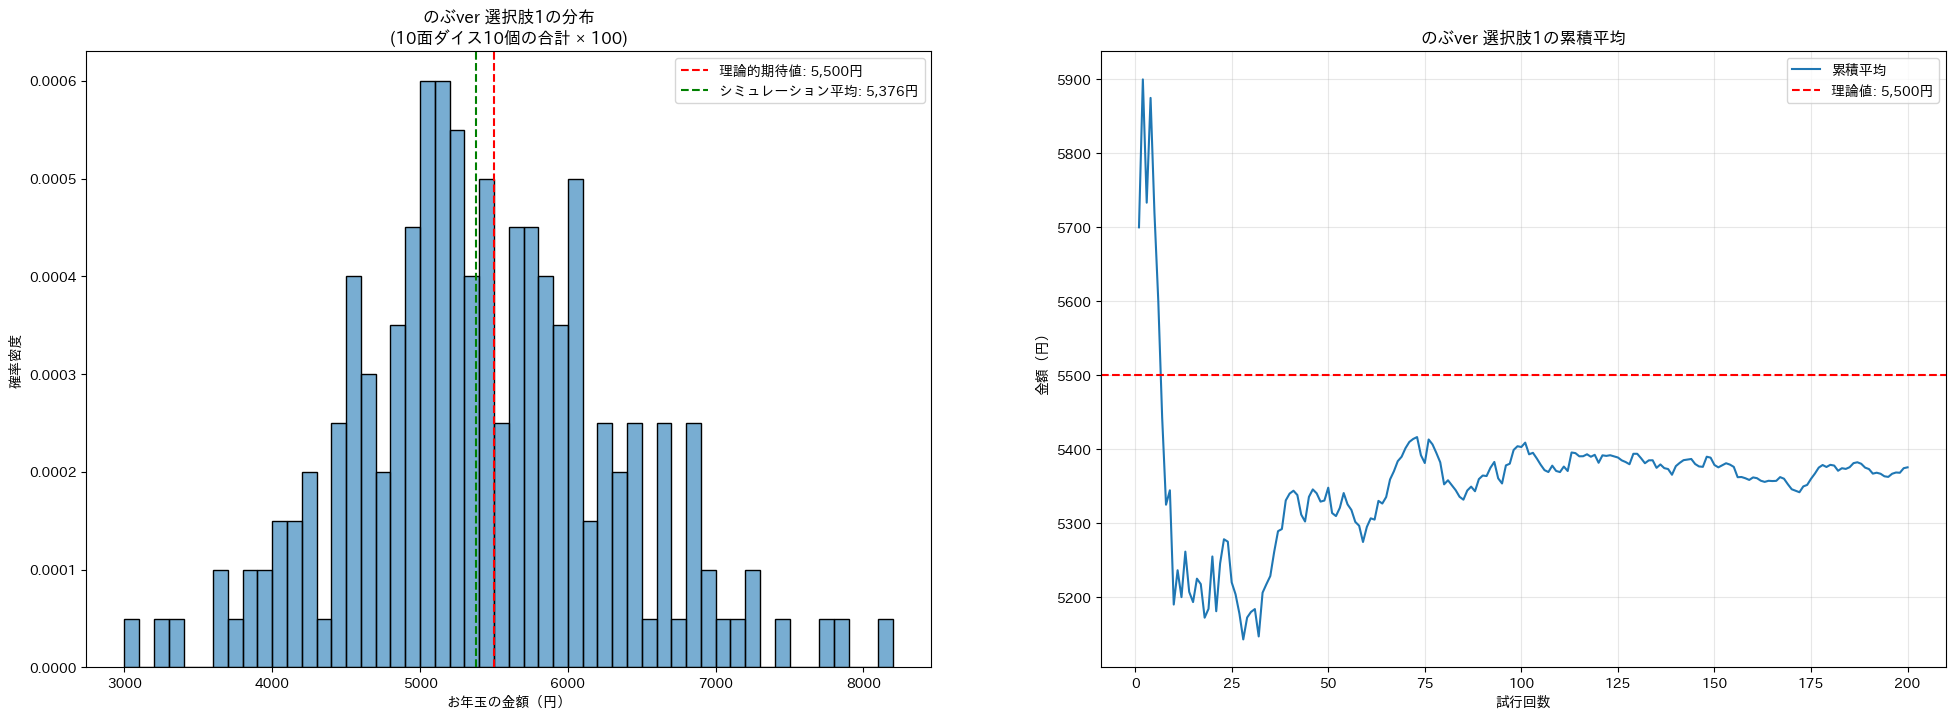

In [82]:
n_trials = 200

plot_nobu1(n_trials)